In [ ]:
#history save
#model save
#train test validation split

In [ ]:
import numpy as np
import os
from keras.preprocessing.image import image, img_to_array
import matplotlib.image as mpimg
import pandas as pd
import tensorflow as tf
import cv2
import glob
from keras.preprocessing.image import image, img_to_array
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import sklearn.metrics as metrics

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#access google drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
shuffle_buffer = 5000
temperature = 0.1
queue_size = 10000
contrastive_augmenter = {
    "brightness": 0.5,
    "name": "contrastive_augmenter",
    "scale": (0.2, 1.0),
}
classification_augmenter = {
    "brightness": 0.2,
    "name": "classification_augmenter",
    "scale": (0.5, 1.0),
}
input_shape = (96, 96, 3)
width = 128
num_epochs = 200
steps_per_epoch = 200

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/drive/MyDrive/leapGestRecog/00'):
    if not j.startswith('.'): # If running this code locally, this is to
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

In [ ]:
x_data1 = []
x_data = []
y_data = []
datacount = 0
for i in range(0, 1):
################### ARUNAVO BHAIA NOTE#####################################
################### for i in range(0, 10) FOR FULL DATASET##############################
    for j in os.listdir('/content/drive/MyDrive/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('/content/drive/MyDrive/leapGestRecog/0' +
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = image.load_img(('/content/drive/MyDrive/leapGestRecog/0' +
                                 str(i) + '/' + j + '/' + k),
                color_mode='rgb',
                target_size=(96, 96)
                )
                x_data1.append(img)
                count = count + 1
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count

In [ ]:
datacount

2000

In [ ]:
y_data = np.array(y_data)
y_data = y_data.reshape(datacount,)
for index1 in x_data1:
  k1=tf.keras.preprocessing.image.img_to_array(index1)
  x_data.append(tf.convert_to_tensor(k1, dtype=tf.uint8, name=None))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)

In [ ]:
X_trainn, test_dataset_image, y_trainn, test_dataset_label = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
unlabeled_train_dataset_image, labeled_train_dataset_image, unlabeled_train_dataset_label, labeled_train_dataset_label = train_test_split(X_trainn, y_trainn, test_size=0.1, random_state=42, stratify=y_trainn)

In [ ]:
unlabeled_train_dataset_label = tf.convert_to_tensor(unlabeled_train_dataset_label)
labeled_train_dataset_label = tf.convert_to_tensor(labeled_train_dataset_label)
test_dataset_label = tf.convert_to_tensor(test_dataset_label)
y_test=tf.convert_to_tensor(y_test)

In [ ]:
y_test

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([4, 0, 3, 8, 4, 4, 3, 5, 4, 4, 6, 9, 8, 8, 7, 2, 6, 8, 8, 3, 4, 4,
       6, 5, 8, 4, 5, 5, 9, 5, 4, 2, 4, 5, 4, 5, 7, 4, 6, 1, 3, 2, 6, 1,
       7, 2, 1, 7, 3, 1, 0, 6, 2, 7, 5, 2, 1, 8, 9, 4, 8, 4, 0, 9, 8, 4,
       9, 6, 7, 7, 4, 6, 6, 1, 3, 0, 7, 2, 4, 9, 0, 2, 6, 3, 3, 0, 7, 7,
       1, 7, 2, 3, 8, 3, 6, 6, 6, 5, 4, 1, 4, 3, 0, 9, 3, 3, 1, 9, 5, 9,
       2, 9, 8, 2, 3, 5, 6, 1, 8, 8, 0, 5, 1, 0, 6, 1, 9, 1, 2, 4, 2, 0,
       0, 8, 6, 2, 8, 2, 8, 1, 7, 8, 4, 8, 0, 5, 6, 5, 2, 3, 8, 7, 7, 1,
       0, 4, 9, 8, 5, 1, 7, 9, 7, 1, 7, 7, 4, 4, 2, 8, 6, 1, 3, 6, 6, 7,
       5, 4, 5, 9, 0, 1, 6, 7, 1, 4, 9, 1, 8, 0, 1, 9, 4, 2, 1, 4, 4, 8,
       0, 1, 7, 8, 1, 2, 0, 1, 0, 6, 7, 3, 3, 1, 6, 3, 1, 1, 0, 5, 3, 6,
       6, 2, 1, 6, 0, 4, 2, 6, 8, 2, 5, 4, 1, 7, 1, 0, 9, 9, 2, 9, 2, 0,
       9, 9, 5, 6, 5, 8, 5, 8, 5, 5, 3, 5, 1, 3, 1, 5, 9, 0, 3, 5, 4, 5,
       7, 6, 2, 7, 2, 8, 4, 1, 0, 7, 2, 7, 8, 3, 1, 7, 3, 7, 2, 8, 7, 9,
     

In [ ]:
labeled_train_dataset_label

<tf.Tensor: shape=(98,), dtype=int64, numpy=
array([2, 6, 0, 1, 2, 5, 9, 5, 6, 1, 8, 6, 3, 2, 0, 5, 3, 3, 7, 2, 8, 9,
       5, 7, 7, 7, 8, 9, 3, 4, 0, 7, 5, 4, 0, 9, 9, 8, 7, 5, 8, 7, 4, 5,
       5, 4, 9, 2, 7, 0, 8, 3, 9, 6, 2, 6, 1, 8, 5, 9, 0, 1, 3, 4, 2, 4,
       3, 5, 9, 6, 0, 3, 6, 2, 1, 7, 8, 9, 6, 6, 4, 3, 6, 3, 0, 7, 1, 4,
       4, 8, 0, 2, 1, 2, 4, 1, 0, 1])>

In [ ]:
unlabeled_train_dataset_label

<tf.Tensor: shape=(882,), dtype=int64, numpy=
array([8, 5, 0, 4, 0, 5, 2, 4, 4, 6, 8, 4, 1, 7, 6, 6, 3, 7, 8, 4, 3, 2,
       8, 5, 0, 6, 8, 2, 1, 5, 0, 7, 0, 0, 9, 0, 3, 3, 8, 0, 3, 0, 9, 2,
       5, 7, 0, 7, 7, 2, 4, 3, 6, 3, 1, 4, 5, 4, 2, 6, 4, 5, 3, 6, 8, 1,
       7, 3, 2, 6, 5, 7, 6, 1, 6, 4, 5, 4, 6, 5, 6, 0, 8, 3, 7, 5, 4, 1,
       6, 0, 2, 3, 6, 6, 0, 5, 9, 1, 0, 9, 2, 3, 8, 9, 4, 4, 2, 4, 0, 2,
       8, 8, 0, 4, 1, 2, 9, 6, 7, 2, 6, 9, 2, 3, 6, 7, 2, 3, 8, 1, 8, 1,
       7, 6, 9, 9, 9, 8, 9, 7, 8, 5, 2, 3, 2, 2, 5, 5, 1, 4, 1, 8, 3, 8,
       6, 2, 7, 6, 1, 6, 2, 5, 4, 5, 7, 3, 0, 3, 0, 4, 8, 4, 1, 7, 2, 8,
       5, 6, 0, 2, 1, 4, 0, 3, 2, 1, 4, 9, 9, 7, 6, 6, 7, 1, 6, 8, 2, 8,
       5, 4, 4, 3, 5, 8, 1, 5, 0, 2, 8, 3, 3, 1, 8, 0, 1, 9, 8, 5, 1, 8,
       1, 2, 5, 7, 4, 5, 0, 9, 3, 7, 7, 4, 9, 1, 3, 1, 3, 3, 2, 2, 9, 2,
       9, 5, 4, 9, 0, 2, 4, 7, 0, 0, 7, 4, 4, 5, 2, 0, 1, 7, 5, 5, 2, 6,
       8, 0, 0, 3, 5, 0, 2, 2, 5, 4, 4, 6, 8, 0, 2, 3, 6, 8, 6, 5, 1, 2,
     

In [ ]:
test_dataset_label

<tf.Tensor: shape=(420,), dtype=int64, numpy=
array([9, 2, 2, 9, 4, 1, 7, 6, 4, 6, 1, 5, 4, 3, 1, 7, 1, 2, 3, 0, 0, 4,
       6, 6, 5, 4, 8, 5, 3, 7, 5, 3, 9, 0, 8, 4, 5, 8, 6, 5, 2, 5, 5, 7,
       1, 8, 7, 9, 5, 6, 8, 9, 7, 8, 5, 1, 7, 3, 3, 4, 7, 1, 7, 1, 1, 1,
       6, 3, 4, 5, 5, 7, 0, 0, 0, 5, 2, 6, 2, 2, 8, 1, 4, 1, 8, 1, 7, 7,
       8, 9, 4, 1, 2, 2, 5, 9, 0, 3, 0, 9, 9, 4, 8, 3, 6, 4, 3, 2, 2, 4,
       6, 8, 8, 8, 0, 7, 3, 7, 3, 0, 1, 0, 5, 2, 7, 6, 6, 9, 9, 5, 2, 3,
       0, 0, 0, 9, 0, 6, 5, 1, 2, 7, 1, 0, 5, 7, 5, 6, 7, 4, 2, 3, 7, 8,
       5, 7, 1, 5, 4, 3, 8, 9, 0, 9, 0, 4, 6, 4, 6, 6, 6, 7, 4, 9, 0, 4,
       4, 4, 1, 5, 8, 3, 5, 0, 4, 0, 7, 4, 0, 3, 9, 7, 7, 7, 2, 0, 2, 3,
       7, 7, 8, 2, 8, 2, 2, 4, 6, 1, 9, 2, 0, 1, 4, 7, 4, 4, 9, 3, 2, 3,
       1, 5, 6, 5, 2, 0, 7, 1, 8, 8, 2, 9, 8, 4, 1, 0, 3, 5, 3, 4, 3, 5,
       9, 3, 1, 6, 6, 3, 9, 9, 8, 6, 3, 4, 2, 6, 8, 6, 8, 0, 8, 2, 1, 7,
       7, 4, 5, 6, 5, 4, 6, 7, 0, 8, 0, 1, 8, 8, 3, 2, 0, 4, 2, 2, 8, 0,
     

In [ ]:
labelled_train_images = 98
unlabelled_images = 882

In [ ]:
unlabeled_batch_size = unlabelled_images // steps_per_epoch
labeled_batch_size = labelled_train_images // steps_per_epoch
batch_size = unlabeled_batch_size + labeled_batch_size

In [ ]:
batch_size

4

In [ ]:
dataset1 = tf.data.Dataset.from_tensors(unlabeled_train_dataset_image)
dataset2 = tf.data.Dataset.from_tensors(unlabeled_train_dataset_label)
unlabeled_train_dataset = tf.data.Dataset.zip(
(dataset1, dataset2)
).prefetch(buffer_size=AUTOTUNE)

dataset3 = tf.data.Dataset.from_tensors(labeled_train_dataset_image)
dataset4 = tf.data.Dataset.from_tensors(labeled_train_dataset_label)
labeled_train_dataset = tf.data.Dataset.zip(
(dataset3, dataset4)
).prefetch(buffer_size=AUTOTUNE)




train_dataset = tf.data.Dataset.zip(
(unlabeled_train_dataset, labeled_train_dataset)
).prefetch(buffer_size=AUTOTUNE)

dataset5 = tf.data.Dataset.from_tensors(test_dataset_image)
dataset6 = tf.data.Dataset.from_tensors(test_dataset_label)
test_dataset = tf.data.Dataset.zip(
(dataset5, dataset6)
).prefetch(buffer_size=AUTOTUNE)

In [ ]:
dataset7 = tf.data.Dataset.from_tensors(X_test)
dataset8 = tf.data.Dataset.from_tensors(y_test)
final_testing = tf.data.Dataset.zip(
(dataset7, dataset8)
).prefetch(buffer_size=AUTOTUNE)

In [ ]:
final_testing

<PrefetchDataset element_spec=(TensorSpec(shape=(600, 96, 96, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(600,), dtype=tf.int64, name=None))>

In [ ]:
train_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(882, 96, 96, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(882,), dtype=tf.int64, name=None)), (TensorSpec(shape=(98, 96, 96, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(98,), dtype=tf.int64, name=None)))>

In [ ]:
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(420, 96, 96, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(420,), dtype=tf.int64, name=None))>

In [ ]:
class RandomResizedCrop(layers.Layer):
    def __init__(self, scale, ratio):
        super(RandomResizedCrop, self).__init__()
        self.scale = scale
        self.log_ratio = (tf.math.log(ratio[0]), tf.math.log(ratio[1]))

    def call(self, images):
        batch_size = tf.shape(images)[0]
        height = tf.shape(images)[1]
        width = tf.shape(images)[2]

        random_scales = tf.random.uniform((batch_size,), self.scale[0], self.scale[1])
        random_ratios = tf.exp(
            tf.random.uniform((batch_size,), self.log_ratio[0], self.log_ratio[1])
        )

        new_heights = tf.clip_by_value(tf.sqrt(random_scales / random_ratios), 0, 1)
        new_widths = tf.clip_by_value(tf.sqrt(random_scales * random_ratios), 0, 1)
        height_offsets = tf.random.uniform((batch_size,), 0, 1 - new_heights)
        width_offsets = tf.random.uniform((batch_size,), 0, 1 - new_widths)

        bounding_boxes = tf.stack(
            [
                height_offsets,
                width_offsets,
                height_offsets + new_heights,
                width_offsets + new_widths,
            ],
            axis=1,
        )
        images = tf.image.crop_and_resize(
            images, bounding_boxes, tf.range(batch_size), (height, width)
        )
        return images

In [ ]:
class RandomBrightness(layers.Layer):
    def __init__(self, brightness):
        super(RandomBrightness, self).__init__()
        self.brightness = brightness

    def blend(self, images_1, images_2, ratios):
        return tf.clip_by_value(ratios * images_1 + (1.0 - ratios) * images_2, 0, 1)

    def random_brightness(self, images):
        # random interpolation/extrapolation between the image and darkness
        return self.blend(
            images,
            0,
            tf.random.uniform(
                (tf.shape(images)[0], 1, 1, 1), 1 - self.brightness, 1 + self.brightness
            ),
        )

    def call(self, images):
        images = self.random_brightness(images)
        return images


In [ ]:
def augmenter(brightness, name, scale):
    return keras.Sequential(
        [
            layers.Input(shape=input_shape),
            layers.Rescaling(1 / 255),
            layers.RandomFlip("horizontal"),
            RandomResizedCrop(scale=scale, ratio=(3 / 4, 4 / 3)),
            RandomBrightness(brightness=brightness),
        ],
        name=name,
    )


In [ ]:
def encoder():
    return keras.Sequential(
        [
            layers.Input(shape=input_shape),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Conv2D(width, kernel_size=3, strides=2, activation="relu"),
            layers.Flatten(),
            layers.Dense(width, activation="relu"),
        ],
        name="encoder",
    )

In [ ]:
class NNCLR(keras.Model):
    def __init__(
        self,
        temperature,
        queue_size,
    ):
        super(NNCLR, self).__init__()
        self.probe_accuracy = keras.metrics.SparseCategoricalAccuracy()
        self.correlation_accuracy = keras.metrics.SparseCategoricalAccuracy()
        self.contrastive_accuracy = keras.metrics.SparseCategoricalAccuracy()
        self.probe_loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

        self.contrastive_augmenter = augmenter(**contrastive_augmenter)
        self.classification_augmenter = augmenter(**classification_augmenter)
        self.encoder = encoder()
        self.projection_head = keras.Sequential(
            [
                layers.Input(shape=(width,)),
                layers.Dense(width, activation="relu"),
                layers.Dense(width),
            ],
            name="projection_head",
        )
        self.linear_probe = keras.Sequential(
            [layers.Input(shape=(width,)), layers.Dense(10)], name="linear_probe"
        )
        self.temperature = temperature

        feature_dimensions = self.encoder.output_shape[1]
        self.feature_queue = tf.Variable(
            tf.math.l2_normalize(
                tf.random.normal(shape=(queue_size, feature_dimensions)), axis=1
            ),
            trainable=False,
        )

    def compile(self, contrastive_optimizer, probe_optimizer, **kwargs):
        super(NNCLR, self).compile(**kwargs)
        self.contrastive_optimizer = contrastive_optimizer
        self.probe_optimizer = probe_optimizer

    def nearest_neighbour(self, projections):
        support_similarities = tf.matmul(
            projections, self.feature_queue, transpose_b=True
        )
        nn_projections = tf.gather(
            self.feature_queue, tf.argmax(support_similarities, axis=1), axis=0
        )
        return projections + tf.stop_gradient(nn_projections - projections)

    def update_contrastive_accuracy(self, features_1, features_2):
        features_1 = tf.math.l2_normalize(features_1, axis=1)
        features_2 = tf.math.l2_normalize(features_2, axis=1)
        similarities = tf.matmul(features_1, features_2, transpose_b=True)

        batch_size = tf.shape(features_1)[0]
        contrastive_labels = tf.range(batch_size)
        self.contrastive_accuracy.update_state(
            tf.concat([contrastive_labels, contrastive_labels], axis=0),
            tf.concat([similarities, tf.transpose(similarities)], axis=0),
        )

    def update_correlation_accuracy(self, features_1, features_2):
        features_1 = (
            features_1 - tf.reduce_mean(features_1, axis=0)
        ) / tf.math.reduce_std(features_1, axis=0)
        features_2 = (
            features_2 - tf.reduce_mean(features_2, axis=0)
        ) / tf.math.reduce_std(features_2, axis=0)

        batch_size = tf.shape(features_1, out_type=tf.float32)[0]
        cross_correlation = (
            tf.matmul(features_1, features_2, transpose_a=True) / batch_size
        )

        feature_dim = tf.shape(features_1)[1]
        correlation_labels = tf.range(feature_dim)
        self.correlation_accuracy.update_state(
            tf.concat([correlation_labels, correlation_labels], axis=0),
            tf.concat([cross_correlation, tf.transpose(cross_correlation)], axis=0),
        )

    def contrastive_loss(self, projections_1, projections_2):
        projections_1 = tf.math.l2_normalize(projections_1, axis=1)
        projections_2 = tf.math.l2_normalize(projections_2, axis=1)

        similarities_1_2_1 = (
            tf.matmul(
                self.nearest_neighbour(projections_1), projections_2, transpose_b=True
            )
            / self.temperature
        )
        similarities_1_2_2 = (
            tf.matmul(
                projections_2, self.nearest_neighbour(projections_1), transpose_b=True
            )
            / self.temperature
        )

        similarities_2_1_1 = (
            tf.matmul(
                self.nearest_neighbour(projections_2), projections_1, transpose_b=True
            )
            / self.temperature
        )
        similarities_2_1_2 = (
            tf.matmul(
                projections_1, self.nearest_neighbour(projections_2), transpose_b=True
            )
            / self.temperature
        )

        batch_size = tf.shape(projections_1)[0]
        contrastive_labels = tf.range(batch_size)
        loss = keras.losses.sparse_categorical_crossentropy(
        #loss = keras.losses.categorical_crossentropy(
            tf.concat(
                [
                    contrastive_labels,
                    contrastive_labels,
                    contrastive_labels,
                    contrastive_labels,
                ],
                axis=0,
            ),
            tf.concat(
                [
                    similarities_1_2_1,
                    similarities_1_2_2,
                    similarities_2_1_1,
                    similarities_2_1_2,
                ],
                axis=0,
            ),
            from_logits=True,
        )

        self.feature_queue.assign(
            tf.concat([projections_1, self.feature_queue[:-batch_size]], axis=0)
        )
        return loss

    def train_step(self, data):
        (unlabeled_images, _), (labeled_images, labels) = data
        images = tf.concat((unlabeled_images, labeled_images), axis=0)
        augmented_images_1 = self.contrastive_augmenter(images)
        augmented_images_2 = self.contrastive_augmenter(images)

        with tf.GradientTape() as tape:
            features_1 = self.encoder(augmented_images_1)
            features_2 = self.encoder(augmented_images_2)
            projections_1 = self.projection_head(features_1)
            projections_2 = self.projection_head(features_2)
            contrastive_loss = self.contrastive_loss(projections_1, projections_2)
        gradients = tape.gradient(
            contrastive_loss,
            self.encoder.trainable_weights + self.projection_head.trainable_weights,
        )
        self.contrastive_optimizer.apply_gradients(
            zip(
                gradients,
                self.encoder.trainable_weights + self.projection_head.trainable_weights,
            )
        )
        self.update_contrastive_accuracy(features_1, features_2)
        self.update_correlation_accuracy(features_1, features_2)
        preprocessed_images = self.classification_augmenter(labeled_images)

        with tf.GradientTape() as tape:
            features = self.encoder(preprocessed_images)
            class_logits = self.linear_probe(features)
            probe_loss = self.probe_loss(labels, class_logits)
        gradients = tape.gradient(probe_loss, self.linear_probe.trainable_weights)
        self.probe_optimizer.apply_gradients(
            zip(gradients, self.linear_probe.trainable_weights)
        )
        self.probe_accuracy.update_state(labels, class_logits)

        return {
            "c_loss": contrastive_loss,
            "c_acc": self.contrastive_accuracy.result(),
            "r_acc": self.correlation_accuracy.result(),
            "p_loss": probe_loss,
            "p_acc": self.probe_accuracy.result(),
        }

    def test_step(self, data):
        labeled_images, labels = data

        preprocessed_images = self.classification_augmenter(
            labeled_images, training=False
        )
        features = self.encoder(preprocessed_images, training=False)
        class_logits = self.linear_probe(features, training=False)
        probe_loss = self.probe_loss(labels, class_logits)

        self.probe_accuracy.update_state(labels, class_logits)
        return {"p_loss": probe_loss, "p_acc": self.probe_accuracy.result()}


In [ ]:
model = NNCLR(temperature=temperature, queue_size=queue_size)
model.compile(
    contrastive_optimizer=keras.optimizers.Adam(),
    probe_optimizer=keras.optimizers.Adam(),
)

In [ ]:
pip install codecarbon

In [ ]:
from codecarbon import EmissionsTracker

In [ ]:
with tf.device('/device:GPU:0'):
  tracker = EmissionsTracker()
  tracker.start()
  pretrain_history = model.fit(
      train_dataset, epochs=num_epochs, validation_data=test_dataset
      )
  emissions = tracker.stop()

[codecarbon INFO @ 19:11:08] [setup] RAM Tracking...
[codecarbon INFO @ 19:11:08] [setup] GPU Tracking...
[codecarbon INFO @ 19:11:08] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:11:08] [setup] CPU Tracking...
[codecarbon WARNING @ 19:11:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 19:11:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 19:11:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 19:11:10] >>> Tracker's metadata:
[codecarbon INFO @ 19:11:10]   Platform system: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
[codecarbon INFO @ 19:11:10]   Python version: 3.7.13
[codecarbon INFO @ 19:11:10]   Available RAM : 51.001 GB
[codecarbon INFO @ 19:11:10]   CPU count: 8
[codecarbon INFO @ 19:11:10]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 19:11:10]   GPU count: 1
[codecarbon INFO @ 19:11:10]   GPU mode

Epoch 1/200
1/1 [==============================] - 6s 6s/step - c_loss: 7.0685 - c_acc: 0.0194 - r_acc: 0.0938 - p_loss: 2.3168 - p_acc: 0.0510 - val_p_loss: 2.3188 - val_p_acc: 0.0762
Epoch 2/200
1/1 [==============================] - 0s 404ms/step - c_loss: 7.0078 - c_acc: 0.0209 - r_acc: 0.0586 - p_loss: 2.3289 - p_acc: 0.1531 - val_p_loss: 2.3296 - val_p_acc: 0.0881
Epoch 3/200
1/1 [==============================] - 0s 409ms/step - c_loss: 6.8860 - c_acc: 0.0133 - r_acc: 0.0352 - p_loss: 2.3286 - p_acc: 0.0816 - val_p_loss: 2.3546 - val_p_acc: 0.0952
Epoch 4/200
1/1 [==============================] - 0s 413ms/step - c_loss: 6.8760 - c_acc: 0.0199 - r_acc: 0.0625 - p_loss: 2.3998 - p_acc: 0.0714 - val_p_loss: 2.3935 - val_p_acc: 0.1024
Epoch 5/200
1/1 [==============================] - 0s 406ms/step - c_loss: 6.8698 - c_acc: 0.0189 - r_acc: 0.0977 - p_loss: 2.4598 - p_acc: 0.0816 - val_p_loss: 2.4574 - val_p_acc: 0.0929
Epoch 6/200
1/1 [==============================] - 0s 404ms/ste

[codecarbon INFO @ 19:11:25] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:11:25] Energy consumed for all GPUs : 0.000739 kWh. All GPUs Power : 177.33700000000002 W
[codecarbon INFO @ 19:11:25] Energy consumed for all CPUs : 0.000177 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:11:25] 0.000996 kWh of electricity used since the begining.


1/1 [==============================] - 0s 405ms/step - c_loss: 6.7700 - c_acc: 0.0112 - r_acc: 0.0820 - p_loss: 2.3749 - p_acc: 0.2041 - val_p_loss: 2.3644 - val_p_acc: 0.2214
Epoch 24/200
1/1 [==============================] - 0s 404ms/step - c_loss: 6.7569 - c_acc: 0.0112 - r_acc: 0.0898 - p_loss: 2.4081 - p_acc: 0.1633 - val_p_loss: 2.3770 - val_p_acc: 0.2024
Epoch 25/200
1/1 [==============================] - 0s 403ms/step - c_loss: 6.7618 - c_acc: 0.0066 - r_acc: 0.1055 - p_loss: 2.3843 - p_acc: 0.2347 - val_p_loss: 2.4058 - val_p_acc: 0.2310
Epoch 26/200
1/1 [==============================] - 0s 409ms/step - c_loss: 6.7043 - c_acc: 0.0128 - r_acc: 0.1250 - p_loss: 2.3854 - p_acc: 0.1735 - val_p_loss: 2.3800 - val_p_acc: 0.2643
Epoch 27/200
1/1 [==============================] - 0s 412ms/step - c_loss: 6.7589 - c_acc: 0.0082 - r_acc: 0.0781 - p_loss: 2.4339 - p_acc: 0.2449 - val_p_loss: 2.3327 - val_p_acc: 0.2690
Epoch 28/200
1/1 [==============================] - 0s 404ms/step - 

[codecarbon INFO @ 19:11:40] Energy consumed for RAM : 0.000159 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:11:40] Energy consumed for all GPUs : 0.001194 kWh. All GPUs Power : 109.232 W
[codecarbon INFO @ 19:11:40] Energy consumed for all CPUs : 0.000354 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:11:40] 0.001708 kWh of electricity used since the begining.


1/1 [==============================] - 0s 403ms/step - c_loss: 5.8897 - c_acc: 0.0224 - r_acc: 0.1797 - p_loss: 2.1038 - p_acc: 0.2551 - val_p_loss: 2.1085 - val_p_acc: 0.2524
Epoch 60/200
1/1 [==============================] - 0s 401ms/step - c_loss: 5.8515 - c_acc: 0.0163 - r_acc: 0.1641 - p_loss: 2.0725 - p_acc: 0.2347 - val_p_loss: 2.0880 - val_p_acc: 0.2762
Epoch 61/200
1/1 [==============================] - 0s 402ms/step - c_loss: 5.8446 - c_acc: 0.0163 - r_acc: 0.2109 - p_loss: 2.0921 - p_acc: 0.2653 - val_p_loss: 2.0620 - val_p_acc: 0.2524
Epoch 62/200
1/1 [==============================] - 0s 403ms/step - c_loss: 5.7993 - c_acc: 0.0138 - r_acc: 0.1367 - p_loss: 2.0961 - p_acc: 0.2143 - val_p_loss: 2.0557 - val_p_acc: 0.2595
Epoch 63/200
1/1 [==============================] - 0s 403ms/step - c_loss: 5.7976 - c_acc: 0.0138 - r_acc: 0.1797 - p_loss: 2.0651 - p_acc: 0.2041 - val_p_loss: 2.0566 - val_p_acc: 0.2762
Epoch 64/200
1/1 [==============================] - 0s 400ms/step - 

[codecarbon INFO @ 19:11:55] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:11:55] Energy consumed for all GPUs : 0.001586 kWh. All GPUs Power : 94.13800000000002 W


Epoch 95/200


[codecarbon INFO @ 19:11:55] Energy consumed for all CPUs : 0.000531 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:11:55] 0.002356 kWh of electricity used since the begining.


1/1 [==============================] - 0s 405ms/step - c_loss: 5.2097 - c_acc: 0.0184 - r_acc: 0.2422 - p_loss: 1.9008 - p_acc: 0.4184 - val_p_loss: 1.9022 - val_p_acc: 0.4286
Epoch 96/200
1/1 [==============================] - 0s 404ms/step - c_loss: 5.1742 - c_acc: 0.0260 - r_acc: 0.2422 - p_loss: 1.8497 - p_acc: 0.4694 - val_p_loss: 1.8961 - val_p_acc: 0.4071
Epoch 97/200
1/1 [==============================] - 0s 404ms/step - c_loss: 5.1492 - c_acc: 0.0204 - r_acc: 0.2500 - p_loss: 1.8640 - p_acc: 0.3571 - val_p_loss: 1.8737 - val_p_acc: 0.3952
Epoch 98/200
1/1 [==============================] - 0s 403ms/step - c_loss: 5.1825 - c_acc: 0.0219 - r_acc: 0.2305 - p_loss: 1.8236 - p_acc: 0.3980 - val_p_loss: 1.8403 - val_p_acc: 0.4167
Epoch 99/200
1/1 [==============================] - 0s 403ms/step - c_loss: 5.1563 - c_acc: 0.0209 - r_acc: 0.2500 - p_loss: 1.8050 - p_acc: 0.4082 - val_p_loss: 1.8395 - val_p_acc: 0.4262
Epoch 100/200
1/1 [==============================] - 0s 403ms/step -

[codecarbon INFO @ 19:12:10] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:12:10] Energy consumed for all GPUs : 0.002515 kWh. All GPUs Power : 223.256 W
[codecarbon INFO @ 19:12:10] Energy consumed for all CPUs : 0.000708 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:12:10] 0.003542 kWh of electricity used since the begining.


1/1 [==============================] - 0s 402ms/step - c_loss: 4.8769 - c_acc: 0.0153 - r_acc: 0.2773 - p_loss: 1.7384 - p_acc: 0.5918 - val_p_loss: 1.7343 - val_p_acc: 0.5929
Epoch 131/200
1/1 [==============================] - 0s 403ms/step - c_loss: 4.8329 - c_acc: 0.0199 - r_acc: 0.2578 - p_loss: 1.7261 - p_acc: 0.5510 - val_p_loss: 1.7591 - val_p_acc: 0.5286
Epoch 132/200
1/1 [==============================] - 0s 402ms/step - c_loss: 4.9123 - c_acc: 0.0281 - r_acc: 0.3047 - p_loss: 1.7083 - p_acc: 0.5612 - val_p_loss: 1.7417 - val_p_acc: 0.5071
Epoch 133/200
1/1 [==============================] - 0s 405ms/step - c_loss: 4.8618 - c_acc: 0.0301 - r_acc: 0.2617 - p_loss: 1.6538 - p_acc: 0.6020 - val_p_loss: 1.6977 - val_p_acc: 0.6048
Epoch 134/200
1/1 [==============================] - 0s 402ms/step - c_loss: 4.7958 - c_acc: 0.0306 - r_acc: 0.2812 - p_loss: 1.6811 - p_acc: 0.6327 - val_p_loss: 1.6853 - val_p_acc: 0.6286
Epoch 135/200
1/1 [==============================] - 0s 404ms/st

[codecarbon INFO @ 19:12:25] Energy consumed for RAM : 0.000398 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:12:25] Energy consumed for all GPUs : 0.003206 kWh. All GPUs Power : 165.943 W


1/1 [==============================] - 0s 402ms/step - c_loss: 4.6337 - c_acc: 0.0168 - r_acc: 0.2578 - p_loss: 1.5294 - p_acc: 0.7245 - val_p_loss: 1.5380 - val_p_acc: 0.7167


[codecarbon INFO @ 19:12:25] Energy consumed for all CPUs : 0.000886 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:12:25] 0.004489 kWh of electricity used since the begining.


Epoch 166/200
1/1 [==============================] - 0s 402ms/step - c_loss: 4.5506 - c_acc: 0.0219 - r_acc: 0.3203 - p_loss: 1.5361 - p_acc: 0.7449 - val_p_loss: 1.5582 - val_p_acc: 0.7071
Epoch 167/200
1/1 [==============================] - 0s 403ms/step - c_loss: 4.5447 - c_acc: 0.0245 - r_acc: 0.3047 - p_loss: 1.5298 - p_acc: 0.7143 - val_p_loss: 1.5786 - val_p_acc: 0.6619
Epoch 168/200
1/1 [==============================] - 0s 403ms/step - c_loss: 4.5667 - c_acc: 0.0240 - r_acc: 0.3086 - p_loss: 1.5885 - p_acc: 0.6837 - val_p_loss: 1.6025 - val_p_acc: 0.6524
Epoch 169/200
1/1 [==============================] - 0s 401ms/step - c_loss: 4.6065 - c_acc: 0.0276 - r_acc: 0.3203 - p_loss: 1.5520 - p_acc: 0.7041 - val_p_loss: 1.5822 - val_p_acc: 0.7000
Epoch 170/200
1/1 [==============================] - 0s 402ms/step - c_loss: 4.5545 - c_acc: 0.0291 - r_acc: 0.2773 - p_loss: 1.5452 - p_acc: 0.6939 - val_p_loss: 1.5954 - val_p_acc: 0.6929
Epoch 171/200
1/1 [==============================]

[codecarbon INFO @ 19:12:40] Energy consumed for RAM : 0.000476 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:12:40] Energy consumed for all GPUs : 0.003693 kWh. All GPUs Power : 119.49900000000001 W
[codecarbon INFO @ 19:12:40] Energy consumed for all CPUs : 0.001059 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:12:40] 0.005228 kWh of electricity used since the begining.


In [ ]:
finetuning_model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        augmenter(**classification_augmenter),
        model.encoder,
        layers.Dense(10),
    ],
    name="finetuning_model",
)
finetuning_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

In [ ]:
with tf.device('/device:GPU:0'):
  tracker = EmissionsTracker()
  tracker.start()
  finetuning_history = finetuning_model.fit(
      labeled_train_dataset, epochs=num_epochs, validation_data=test_dataset
      )
  emissions = tracker.stop()

[codecarbon INFO @ 19:12:40] [setup] RAM Tracking...
[codecarbon INFO @ 19:12:40] [setup] GPU Tracking...
[codecarbon INFO @ 19:12:40] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 19:12:40] [setup] CPU Tracking...
[codecarbon WARNING @ 19:12:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 19:12:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 19:12:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 19:12:42] >>> Tracker's metadata:
[codecarbon INFO @ 19:12:42]   Platform system: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
[codecarbon INFO @ 19:12:42]   Python version: 3.7.13
[codecarbon INFO @ 19:12:42]   Available RAM : 51.001 GB
[codecarbon INFO @ 19:12:42]   CPU count: 8
[codecarbon INFO @ 19:12:42]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 19:12:42]   GPU count: 1
[codecarbon INFO @ 19:12:42]   GPU mode

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4982 - acc: 0.0714 - val_loss: 2.3024 - val_acc: 0.0833
Epoch 2/200
1/1 [==============================] - 0s 65ms/step - loss: 2.2985 - acc: 0.1020 - val_loss: 2.2579 - val_acc: 0.1167
Epoch 3/200
1/1 [==============================] - 0s 63ms/step - loss: 2.2523 - acc: 0.1633 - val_loss: 2.2280 - val_acc: 0.1976
Epoch 4/200
1/1 [==============================] - 0s 62ms/step - loss: 2.2202 - acc: 0.1735 - val_loss: 2.2057 - val_acc: 0.2071
Epoch 5/200
1/1 [==============================] - 0s 59ms/step - loss: 2.1887 - acc: 0.2347 - val_loss: 2.1636 - val_acc: 0.2381
Epoch 6/200
1/1 [==============================] - 0s 60ms/step - loss: 2.1188 - acc: 0.3163 - val_loss: 2.0729 - val_acc: 0.2262
Epoch 7/200
1/1 [==============================] - 0s 61ms/step - loss: 2.0449 - acc: 0.2857 - val_loss: 2.0096 - val_acc: 0.2238
Epoch 8/200
1/1 [==============================] - 0s 60ms/step - loss: 2.0040 - acc: 0.2959

[codecarbon INFO @ 19:12:57] Energy consumed for RAM : 0.000080 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:12:57] Energy consumed for all GPUs : 0.000573 kWh. All GPUs Power : 137.505 W
[codecarbon INFO @ 19:12:57] Energy consumed for all CPUs : 0.000177 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:12:57] 0.000830 kWh of electricity used since the begining.


1/1 [==============================] - 0s 70ms/step - loss: 0.0401 - acc: 0.9898 - val_loss: 0.0797 - val_acc: 0.9738
Epoch 189/200
1/1 [==============================] - 0s 64ms/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.1123 - val_acc: 0.9738
Epoch 190/200
1/1 [==============================] - 0s 63ms/step - loss: 0.0857 - acc: 0.9796 - val_loss: 0.1217 - val_acc: 0.9667
Epoch 191/200
1/1 [==============================] - 0s 67ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.1297 - val_acc: 0.9667
Epoch 192/200
1/1 [==============================] - 0s 62ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.1397 - val_acc: 0.9714
Epoch 193/200
1/1 [==============================] - 0s 61ms/step - loss: 0.1239 - acc: 0.9796 - val_loss: 0.1726 - val_acc: 0.9667
Epoch 194/200
1/1 [==============================] - 0s 63ms/step - loss: 0.0333 - acc: 0.9898 - val_loss: 0.1074 - val_acc: 0.9690
Epoch 195/200
1/1 [==============================] - 0s 63ms/step - loss: 0.0182 - acc: 0.

[codecarbon INFO @ 19:12:58] Energy consumed for RAM : 0.000085 kWh. RAM Power : 19.12554788589478 W
[codecarbon INFO @ 19:12:58] Energy consumed for all GPUs : 0.000603 kWh. All GPUs Power : 118.10600000000002 W
[codecarbon INFO @ 19:12:58] Energy consumed for all CPUs : 0.000188 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 19:12:58] 0.000876 kWh of electricity used since the begining.


In [ ]:
# Look at confusion matrix
#import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          #title='Validation Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)

In [ ]:
y_pred = finetuning_model.predict(final_testing)
y_pred

array([[  2.1522152 ,   3.9953182 ,   2.1530643 , ...,   1.0602788 ,
        -15.460298  ,  -4.550816  ],
       [ 16.495598  ,   2.7583513 ,  -7.3897276 , ...,   6.422316  ,
        -18.669865  ,  -1.9117715 ],
       [ -4.8035483 ,  -4.847736  ,   2.7246556 , ...,   4.611799  ,
          1.5227805 ,   0.34002948],
       ...,
       [-10.73233   ,  -6.329082  ,  13.238932  , ...,   5.9839892 ,
          1.948313  ,  -2.3635168 ],
       [-18.29269   ,   4.356189  ,  -9.854051  , ..., -18.797293  ,
        -16.67639   ,  -9.227734  ],
       [ -0.08274657,  15.686321  ,  -7.45298   , ...,  -6.2482314 ,
        -11.288017  ,  -6.685023  ]], dtype=float32)

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([4, 0, 3, 8, 4, 4, 3, 5, 4, 4, 6, 9, 8, 8, 7, 2, 6, 8, 8, 3, 4, 4,
       6, 5, 8, 4, 5, 5, 9, 5, 4, 2, 4, 5, 4, 5, 7, 4, 6, 1, 3, 2, 6, 1,
       7, 2, 1, 7, 3, 1, 0, 6, 2, 7, 5, 2, 1, 8, 4, 4, 8, 4, 0, 9, 8, 4,
       9, 6, 7, 7, 4, 6, 6, 1, 3, 0, 7, 2, 4, 9, 0, 2, 6, 3, 3, 0, 7, 7,
       1, 7, 2, 3, 8, 3, 6, 6, 6, 5, 4, 1, 4, 3, 0, 9, 3, 3, 1, 9, 5, 9,
       2, 9, 8, 2, 3, 5, 6, 1, 8, 8, 0, 5, 1, 0, 6, 1, 9, 1, 2, 4, 2, 0,
       0, 8, 6, 2, 8, 2, 8, 1, 7, 8, 4, 8, 0, 5, 6, 5, 2, 3, 8, 2, 7, 1,
       0, 4, 9, 8, 5, 1, 7, 9, 7, 1, 7, 7, 4, 4, 2, 8, 6, 1, 3, 6, 6, 7,
       5, 4, 5, 9, 0, 1, 6, 7, 1, 4, 9, 1, 8, 0, 1, 9, 4, 2, 1, 4, 4, 8,
       1, 1, 7, 8, 1, 2, 0, 1, 0, 6, 7, 3, 3, 1, 6, 3, 1, 1, 0, 5, 3, 6,
       6, 2, 1, 6, 0, 4, 2, 6, 8, 2, 5, 4, 1, 7, 1, 0, 9, 9, 2, 9, 2, 0,
       9, 9, 5, 6, 5, 8, 5, 8, 5, 5, 3, 5, 1, 3, 1, 5, 9, 0, 3, 5, 0, 5,
       7, 6, 2, 7, 2, 8, 4, 1, 0, 7, 2, 7, 8, 3, 1, 7, 3, 7, 2, 8, 7, 9,
     

In [ ]:
true_categories=y_test
true_categories

<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([4, 0, 3, 8, 4, 4, 3, 5, 4, 4, 6, 9, 8, 8, 7, 2, 6, 8, 8, 3, 4, 4,
       6, 5, 8, 4, 5, 5, 9, 5, 4, 2, 4, 5, 4, 5, 7, 4, 6, 1, 3, 2, 6, 1,
       7, 2, 1, 7, 3, 1, 0, 6, 2, 7, 5, 2, 1, 8, 9, 4, 8, 4, 0, 9, 8, 4,
       9, 6, 7, 7, 4, 6, 6, 1, 3, 0, 7, 2, 4, 9, 0, 2, 6, 3, 3, 0, 7, 7,
       1, 7, 2, 3, 8, 3, 6, 6, 6, 5, 4, 1, 4, 3, 0, 9, 3, 3, 1, 9, 5, 9,
       2, 9, 8, 2, 3, 5, 6, 1, 8, 8, 0, 5, 1, 0, 6, 1, 9, 1, 2, 4, 2, 0,
       0, 8, 6, 2, 8, 2, 8, 1, 7, 8, 4, 8, 0, 5, 6, 5, 2, 3, 8, 7, 7, 1,
       0, 4, 9, 8, 5, 1, 7, 9, 7, 1, 7, 7, 4, 4, 2, 8, 6, 1, 3, 6, 6, 7,
       5, 4, 5, 9, 0, 1, 6, 7, 1, 4, 9, 1, 8, 0, 1, 9, 4, 2, 1, 4, 4, 8,
       0, 1, 7, 8, 1, 2, 0, 1, 0, 6, 7, 3, 3, 1, 6, 3, 1, 1, 0, 5, 3, 6,
       6, 2, 1, 6, 0, 4, 2, 6, 8, 2, 5, 4, 1, 7, 1, 0, 9, 9, 2, 9, 2, 0,
       9, 9, 5, 6, 5, 8, 5, 8, 5, 5, 3, 5, 1, 3, 1, 5, 9, 0, 3, 5, 4, 5,
       7, 6, 2, 7, 2, 8, 4, 1, 0, 7, 2, 7, 8, 3, 1, 7, 3, 7, 2, 8, 7, 9,
     

In [ ]:
confusion_matrix(true_categories, predicted_categories)

array([[58,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  3,  1,  0,  0,  0, 56,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 60,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 58]])

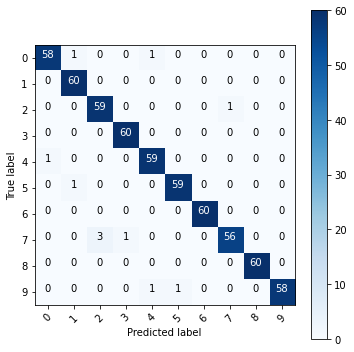

In [ ]:
plot_confusion_matrix(confusion_matrix(true_categories, predicted_categories) ,classes = range(10))

In [ ]:
score  = model.evaluate(final_testing, steps=len(final_testing), verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 273ms/step - p_loss: 5.3000 - p_acc: 0.3367
Test loss: 0.33666667342185974
Test accuracy: 5.300025939941406


In [ ]:
score1  = finetuning_model.evaluate(final_testing, steps=len(final_testing), verbose=1)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

1/1 [==============================] - 0s 297ms/step - loss: 0.0490 - acc: 0.9783
Test loss: 0.04897443950176239
Test accuracy: 0.9783333539962769


In [ ]:
report = metrics.classification_report(true_categories, predicted_categories)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.97      1.00      0.98        60
           2       0.95      0.98      0.97        60
           3       0.98      1.00      0.99        60
           4       0.97      0.98      0.98        60
           5       0.98      0.98      0.98        60
           6       1.00      1.00      1.00        60
           7       0.98      0.93      0.96        60
           8       1.00      1.00      1.00        60
           9       1.00      0.97      0.98        60

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
history = pretrain_history
print(history.history.keys())

dict_keys(['c_loss', 'c_acc', 'r_acc', 'p_loss', 'p_acc', 'val_p_loss', 'val_p_acc'])


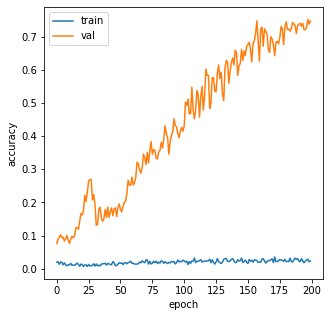

In [ ]:
plt.plot(history.history['c_acc'])
plt.plot(history.history['val_p_acc'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

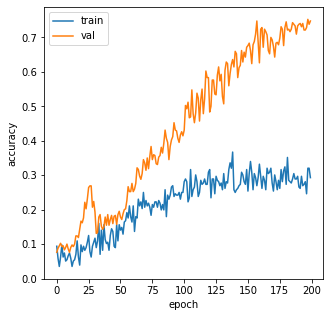

In [ ]:
plt.plot(history.history['r_acc'])
plt.plot(history.history['val_p_acc'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

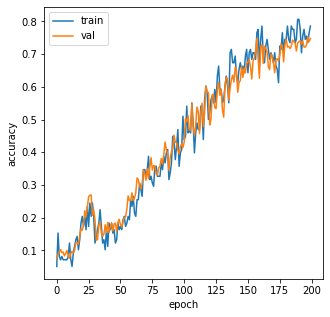

In [ ]:
plt.plot(history.history['p_acc'])
plt.plot(history.history['val_p_acc'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

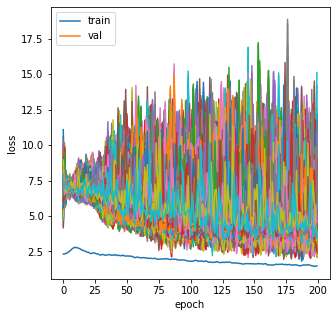

In [ ]:
plt.plot(history.history['c_loss'])
plt.plot(history.history['val_p_loss'])
plt.rcParams["figure.figsize"] = (20,10)
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

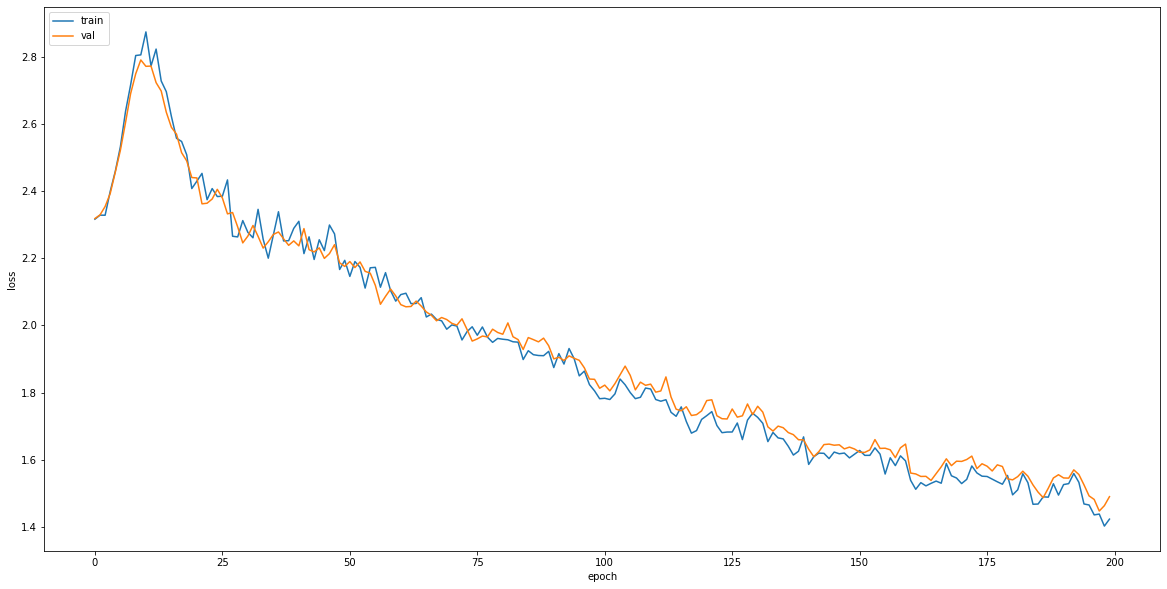

In [ ]:
plt.plot(history.history['p_loss'])
plt.plot(history.history['val_p_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history1 = finetuning_history
print(history1.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


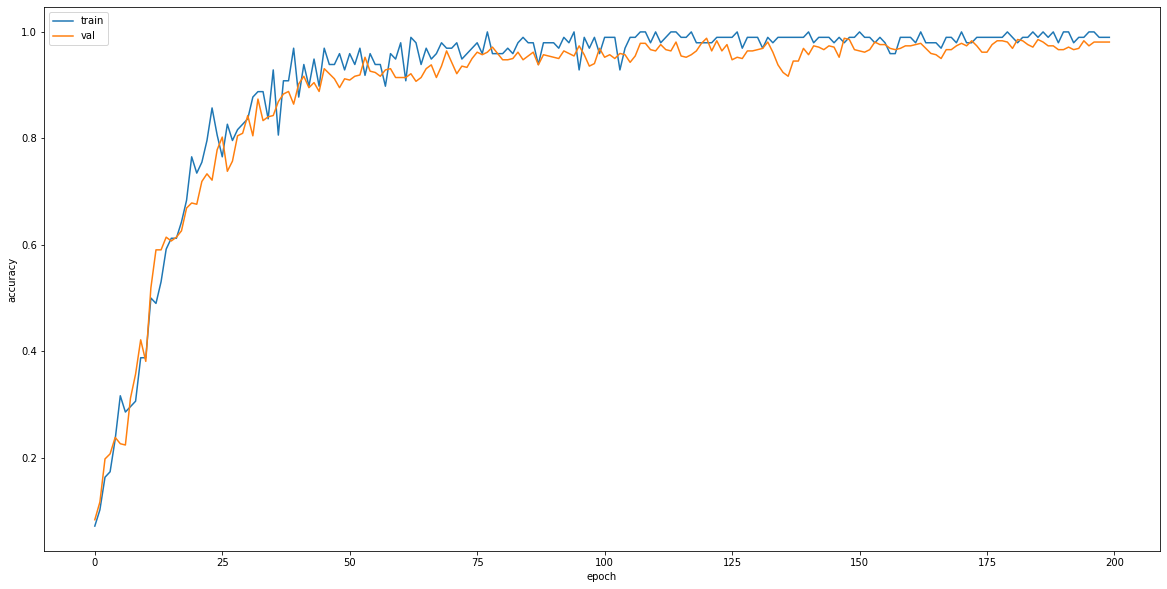

In [ ]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

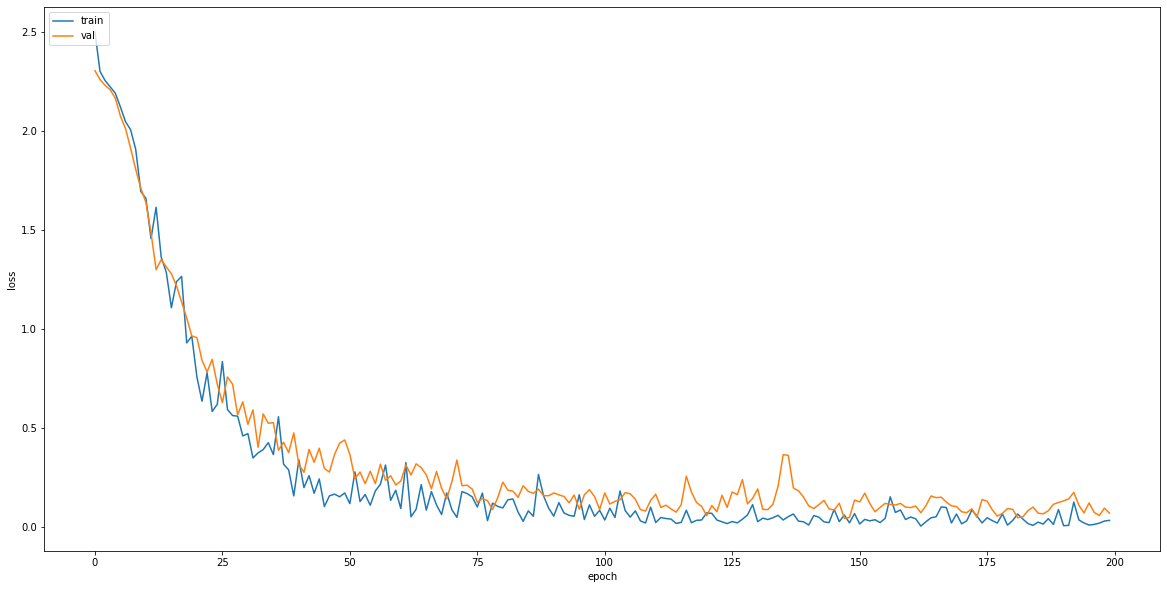

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
#plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

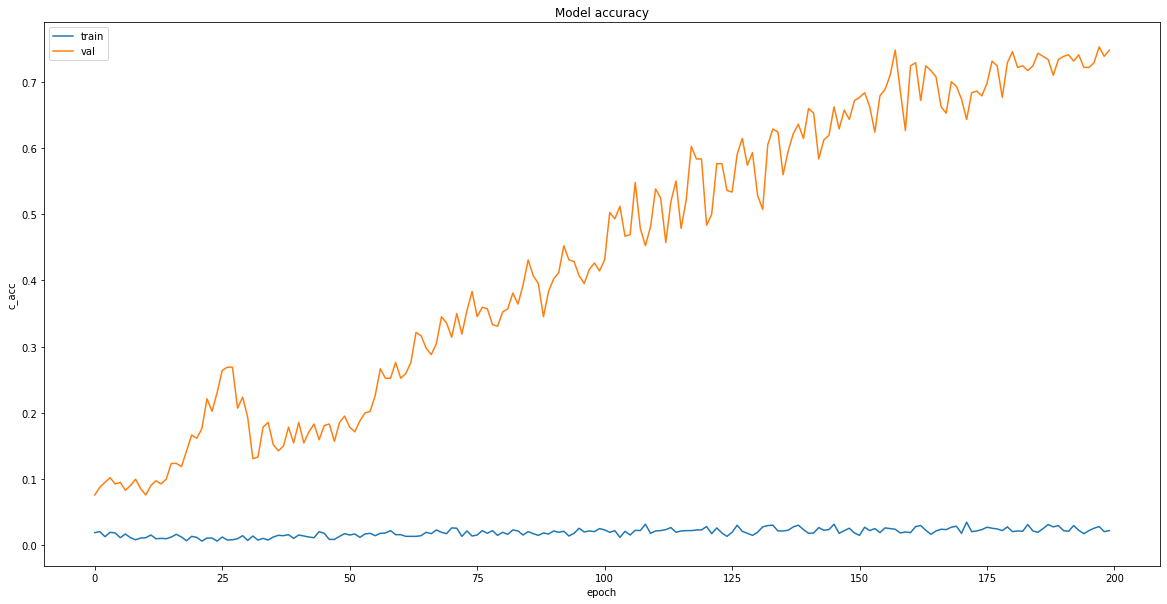

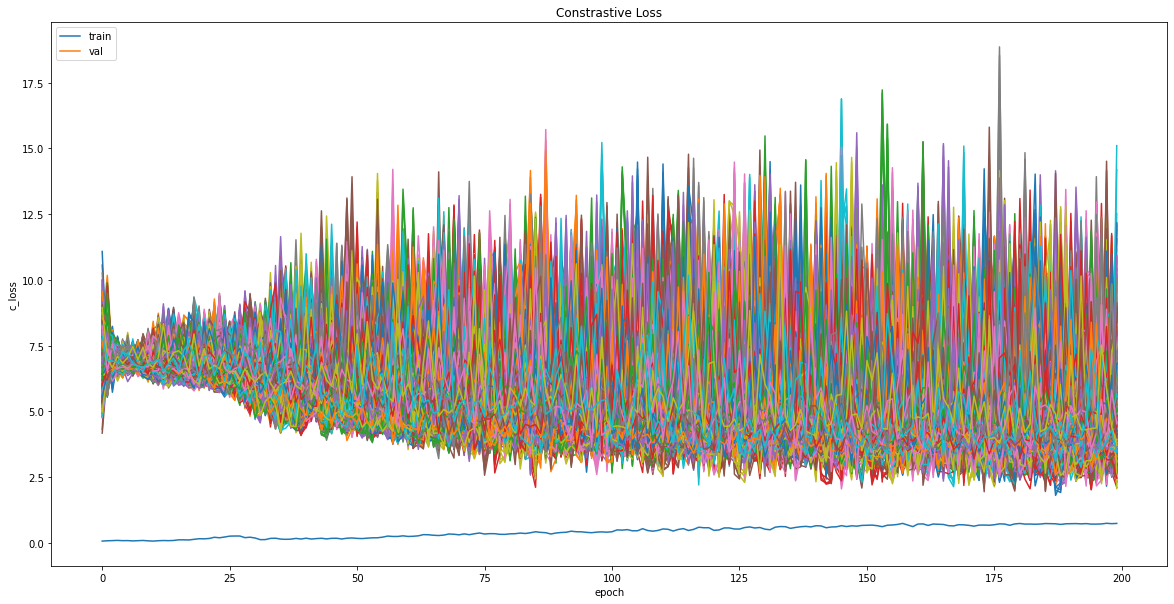

In [ ]:
def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_p_acc"])
        plt.legend(["train", "val"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=history.history, metric="c_acc", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=history.history, metric="c_loss", title="Constrastive Loss")

In [ ]:
x_data1 = []
x_data = []
y_data = []
datacount = 0
for i in range(9,10): # (7,10 for main code)
    for j in os.listdir('/content/drive/MyDrive/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('/content/drive/MyDrive/leapGestRecog/0' +
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = image.load_img(('/content/drive/MyDrive/leapGestRecog/0' +
                                 str(i) + '/' + j + '/' + k),
                color_mode='rgb',
                target_size=(96, 96)
                )
                x_data1.append(img)
                count = count + 1
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count

In [ ]:
datacount

2000

In [ ]:
y_data = np.array(y_data)
y_data = y_data.reshape(datacount,)
y_test2=tf.convert_to_tensor(y_data)
for index1 in x_data1:
  k1=tf.keras.preprocessing.image.img_to_array(index1)
  x_data.append(tf.convert_to_tensor(k1, dtype=tf.uint8, name=None))

In [ ]:
y_test2

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([3, 3, 3, ..., 9, 9, 9])>

In [ ]:
test_leb = y_test2

In [ ]:
dataset9 = tf.data.Dataset.from_tensors(x_data)
dataset10 = tf.data.Dataset.from_tensors(y_test2)
final_testing2 = tf.data.Dataset.zip(
(dataset9, dataset10)
).prefetch(buffer_size=AUTOTUNE)

In [ ]:
final_testing2

<PrefetchDataset element_spec=(TensorSpec(shape=(2000, 96, 96, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(2000,), dtype=tf.int64, name=None))>

In [ ]:
y_pred2 = finetuning_model.predict(final_testing2)
y_pred2

array([[ -5.21445   ,  -2.516619  ,   4.5289903 , ...,   2.0439022 ,
          2.7684157 ,  -1.5499561 ],
       [ -4.323342  ,  -4.080031  ,  -2.1347377 , ...,   2.3902822 ,
          3.513005  ,   1.0015044 ],
       [ -3.2804635 ,  -3.2451565 ,   0.9810328 , ...,   1.4852428 ,
         -1.910531  ,   3.9692028 ],
       ...,
       [-11.837139  ,  -9.611061  ,   0.28875518, ...,  -1.4566158 ,
         -3.062971  ,  13.090655  ],
       [-19.233131  ,  -7.5660424 ,   1.0545256 , ...,  -5.840099  ,
        -17.172945  ,   8.02344   ],
       [-23.209423  ,  -4.9024525 ,  -0.986871  , ..., -12.445174  ,
        -13.6205015 ,   4.3126154 ]], dtype=float32)

In [ ]:
predicted_categories2 = tf.argmax(y_pred2, axis=1)
predicted_categories2

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([3, 3, 9, ..., 9, 4, 5])>

In [ ]:
true_categories2=y_test2
true_categories2

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([3, 3, 3, ..., 9, 9, 9])>

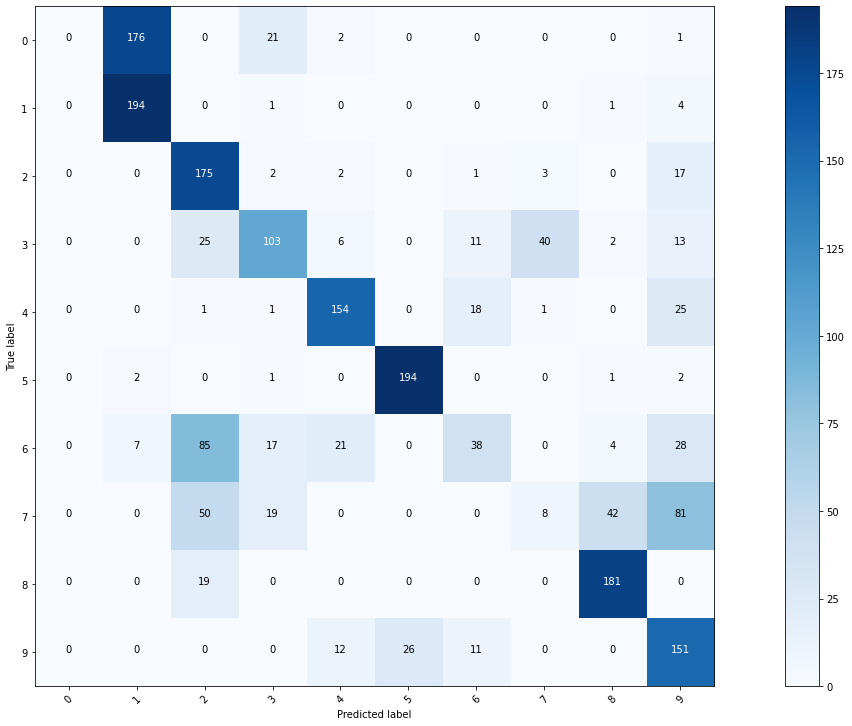

In [ ]:
plot_confusion_matrix(confusion_matrix(true_categories2, predicted_categories2) ,classes = range(10))

In [ ]:
score3  = finetuning_model.evaluate(final_testing2, steps=len(final_testing2), verbose=1)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

1/1 [==============================] - 0s 398ms/step - loss: 1.8941 - acc: 0.5995
Test loss: 1.8940544128417969
Test accuracy: 0.5995000004768372


In [ ]:
report2 = metrics.classification_report(true_categories2, predicted_categories2)
print(report2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.51      0.97      0.67       200
           2       0.49      0.88      0.63       200
           3       0.62      0.52      0.56       200
           4       0.78      0.77      0.78       200
           5       0.88      0.97      0.92       200
           6       0.48      0.19      0.27       200
           7       0.15      0.04      0.06       200
           8       0.78      0.91      0.84       200
           9       0.47      0.76      0.58       200

    accuracy                           0.60      2000
   macro avg       0.52      0.60      0.53      2000
weighted avg       0.52      0.60      0.53      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
